# MAIN FILE : run everything, concat, and save unified geojson
#could add concat and save of half-way files

In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from gis_functions import *

In [3]:
%run -i "tirol_workflow.py"

perfect merge



C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


True    267
dtype: int64
perfect merge



In [2]:
%run -i "sbg_workflow.py"

not all rows have been merged



C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


True    287
dtype: int64
perfect merge



In [ ]:
%run -i "oebo_workflow.py"

In [ ]:
%run -i "noe_workflow.py"

In [1]:
%run -i "karn_workflow.py"

not all rows have been merged



C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


True    673
dtype: int64
perfect merge



In [7]:
%run -i "steyr_workflow.py"

not all rows have been merged

True    1250
dtype: int64
perfect merge

not all rows have been merged

True    1248
dtype: int64
perfect merge



AttributeError: 'GeoDataFrame' object has no attribute 'no_nitri_small'

In [3]:
steyr=geopandas.read_file('final/steyr.geojson')
karn=geopandas.read_file('final/karn.geojson')
tirol=geopandas.read_file('final/tirol.geojson')
oebo=geopandas.read_file('final/oebo.geojson')
sbg=geopandas.read_file('final/sbg.geojson')
noe=geopandas.read_file('final/noe.geojson')


In [4]:
files=[steyr,noe,oebo,tirol,sbg,karn]

In [5]:
cols=['BL','KG','GKZ','before_reg', 'freq',
       'mean_year', 'no_nitri', 'sum_PE','PE_nonitri','%PE_nonitri', '%before_reg', '%no_nitri' ,'geometry']


In [6]:
steyr=steyr.loc[:,cols]
karn=karn.loc[:,cols]
tirol=tirol.loc[:,cols]
oebo=oebo.loc[:,cols]
sbg=sbg.loc[:,cols]
noe=noe.loc[:,cols]
files=[steyr,karn, tirol,sbg,noe,oebo] 

In [7]:
for file in files:
    print(file.columns)

Index(['BL', 'KG', 'GKZ', 'before_reg', 'freq', 'mean_year', 'no_nitri',
       'sum_PE', 'PE_nonitri', '%PE_nonitri', '%before_reg', '%no_nitri',
       'geometry'],
      dtype='object')
Index(['BL', 'KG', 'GKZ', 'before_reg', 'freq', 'mean_year', 'no_nitri',
       'sum_PE', 'PE_nonitri', '%PE_nonitri', '%before_reg', '%no_nitri',
       'geometry'],
      dtype='object')
Index(['BL', 'KG', 'GKZ', 'before_reg', 'freq', 'mean_year', 'no_nitri',
       'sum_PE', 'PE_nonitri', '%PE_nonitri', '%before_reg', '%no_nitri',
       'geometry'],
      dtype='object')
Index(['BL', 'KG', 'GKZ', 'before_reg', 'freq', 'mean_year', 'no_nitri',
       'sum_PE', 'PE_nonitri', '%PE_nonitri', '%before_reg', '%no_nitri',
       'geometry'],
      dtype='object')
Index(['BL', 'KG', 'GKZ', 'before_reg', 'freq', 'mean_year', 'no_nitri',
       'sum_PE', 'PE_nonitri', '%PE_nonitri', '%before_reg', '%no_nitri',
       'geometry'],
      dtype='object')
Index(['BL', 'KG', 'GKZ', 'before_reg', 'freq', 'mean_y

# go on from here

In [8]:
data=pd.concat(files)

<AxesSubplot:>

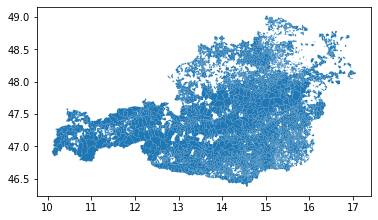

In [9]:
data.plot()


In [13]:
data.groupby('BL').sum()

,GKZ,before_reg,freq,mean_year,no_nitri,sum_PE,PE_nonitri,%PE_nonitri,%before_reg,%no_nitri
BL,,,,,,,,,,
Carintia,13906191,2577,7052,1338321,2335,97832.559817,39658.733333,21577.956706,24978.283457,22053.547821
Lower-Austria,40170236,551,4313,2544418,380,124026.000000,8625.000000,11460.041745,19316.379513,11662.872493
Salzburg,14468651,15,1708,572299,308,30336.960000,4312.000000,4447.797708,346.007969,5554.005042
Stirya,76257947,2294,10173,2476407,2103,84977.000000,15498.000000,22920.534970,33273.464291,30728.417298
Tirol,18845149,533,1294,531659,709,32385.226667,8348.733333,8509.671424,11409.906950,14261.520052
Upper-Austria,27021586,381,2633,1311567,368,48172.000000,2889.000000,7172.474979,8908.741933,8458.990129


In [10]:
#rename BLS
data.replace({'Oberösterreich':'Upper-Austria','Steiermark':'Stirya','Niederösterreich':'Lower-Austria','Tirol':'Tirol','Kärnten':'Carintia',}, inplace=True)

In [11]:
with open('final/complete.geojson', 'w') as f:
    f.write(data.to_json())
